<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/02_Unsupervised%20-%20Machine%20Learning/Hierarchical%20Clustering/Customer%20Mall%20Segmentation(AgglomerativeClustering)/Customer_Mall_Segmentation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

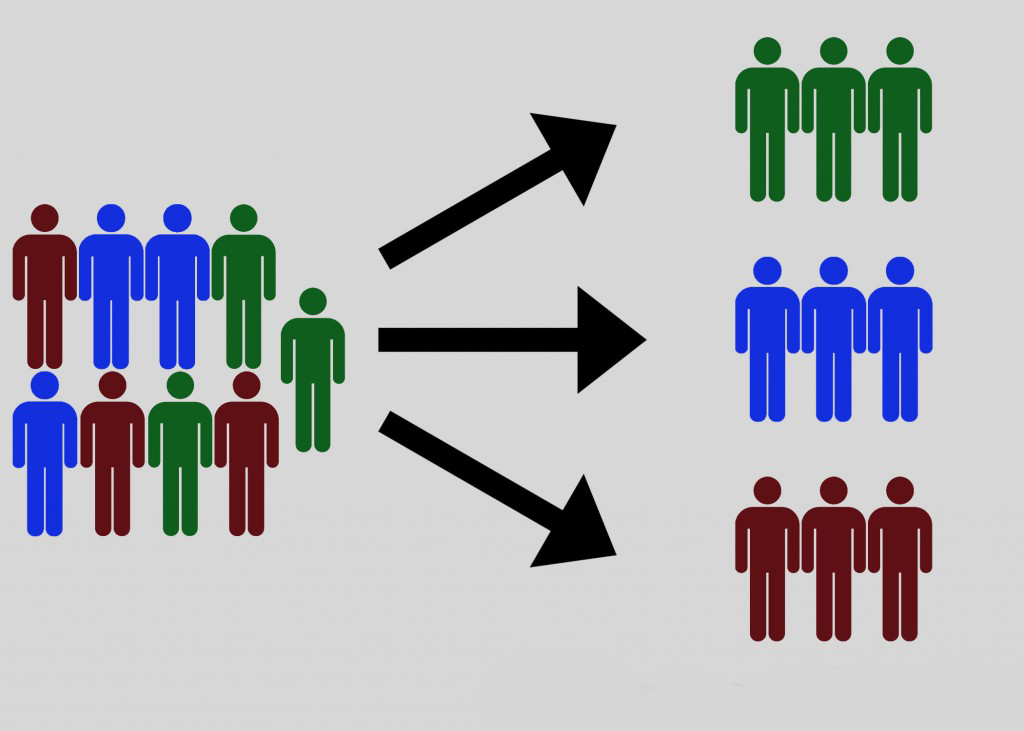
#**Customer Mall Segmentation using Agglomerative Clustering**

##**📘 Project Summary:**

This project applies Agglomerative Hierarchical Clustering to segment mall customers based on their annual income and spending score. The goal is to identify distinct customer groups to help businesses understand their customers’ behavior and spending patterns. Using this unsupervised learning approach, the model successfully formed five clear and meaningful clusters, each representing a unique customer segment with similar purchasing characteristics.

##**🎯 Aim of the Project:**
The main aim is to analyze customer data and group similar customers together to support targeted marketing strategies, improve customer retention, and enhance decision-making for personalized product recommendations.


##**Data Loading and exploration**

In [40]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [41]:
# confirming if my data has missing or null values
print(f"Null Values: {df.isna().sum()}")
print("\n")
print(f"Duplicate Values: {df.duplicated().sum()}")

Null Values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Duplicate Values: 0


## **Feature Engineering**

In [42]:
df["Gender"] = df["Gender"].map({"Male":1, "Female":0})
df = df.drop(columns=["CustomerID"])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


##**Visualising Data**

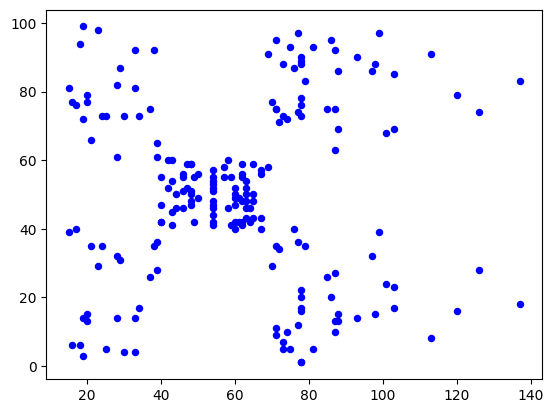

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c="blue", s=19)
plt.show()

##**Scaling features using StandardScaler**

In [44]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_df = pd.DataFrame(scale.fit_transform(df), columns=df.columns)

## **Trying different unsupervised ML algorithm to see performance**

In [45]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

def view(algorithm):
  model = algorithm
  # Combine the two columns into a DataFrame
  X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
  model.fit(X)

  if len(set(model.labels_)) <= 1:
    print(f"{algorithm} score is <= 1" )

  else:
    score = silhouette_score(X, model.labels_)
    print(f"{algorithm} score is: {score}")

print(view(KMeans(5)))
print(view(DBSCAN(eps=2, min_samples=4)))
print(view(AgglomerativeClustering(5)))

KMeans(n_clusters=5) score is: 0.553931997444648
None
DBSCAN(eps=2, min_samples=4) score is: -0.27856166269578403
None
AgglomerativeClustering(n_clusters=5) score is: 0.5529945955148897
None


##**Dendogram plot**

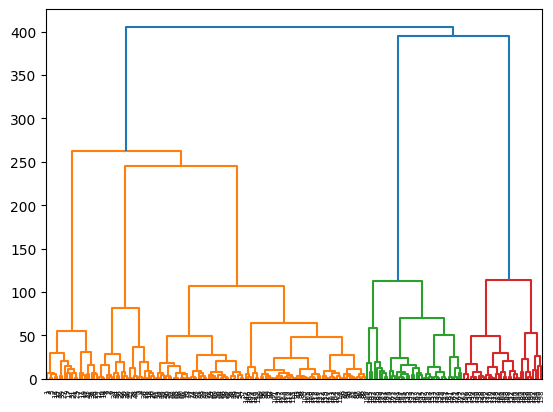

In [46]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))

##**Model Building** (AgglomerativeClustering)

In [47]:
agg = AgglomerativeClustering(5)
scaled_df["cluster"] = agg.fit_predict(X)


## **Visualising CLUSTERS**

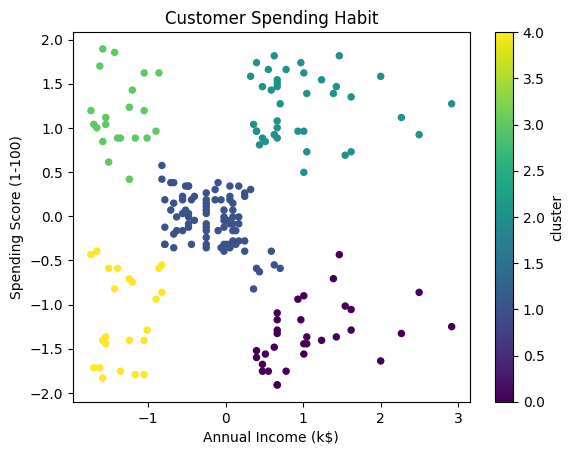

In [48]:
plt.scatter(scaled_df["Annual Income (k$)"], scaled_df["Spending Score (1-100)"], c=scaled_df['cluster'], s=19)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Spending Habit")
plt.colorbar(label='cluster')
plt.show()
plt.show()

#**Assigning clusters back to original dataframe**

In [49]:
df["cluster"] = agg.fit_predict(X)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,0


##**Grouping data by cluster label:** to Interpret each cluster’s behavior

In [50]:
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                                 
0        0.562500  41.000000           89.406250               15.593750
1        0.400000  42.482353           55.811765               49.129412
2        0.461538  32.692308           86.538462               82.128205
3        0.428571  25.333333           25.095238               80.047619
4        0.391304  45.217391           26.304348               20.913043


##**Giving meaningful names to each clusters**

In [51]:
df["cluster_labels"] = df["cluster"].map({0:"High-income, Low-spending customers)", 1:"Average-income, Moderate-spending customers", 2:"High-income, High-spending customers", 3:"Low-income, High-spending customers", 4:"Low-income, Low-spending customers"})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster_labels
0,1,19,15,39,4,"Low-income, Low-spending customers"
1,1,21,15,81,3,"Low-income, High-spending customers"
2,0,20,16,6,4,"Low-income, Low-spending customers"
3,0,23,16,77,3,"Low-income, High-spending customers"
4,0,31,17,40,4,"Low-income, Low-spending customers"


##**Viewing the number of customers that belong to each cluster**

In [52]:
df["cluster_labels"].value_counts()

,count
cluster_labels,
"Average-income, Moderate-spending customers",85
"High-income, High-spending customers",39
"High-income, Low-spending customers)",32
"Low-income, Low-spending customers",23
"Low-income, High-spending customers",21


#**📊 Results & Insights:**
The clustering visualization revealed five distinct customer groups such as:

High-income, high-spending customers

High-income, low-spending customers

Low-income, high-spending customers

Low-income, low-spending customers

Average-income, moderate-spending customers


These insights enable mall management or retailers to design more focused campaigns and customer engagement strategies.


##**Conclusion (Deployment Use Case):**
When deployed, this model can automatically segment new or existing customers into appropriate clusters in real-time. Businesses can then use these segments for personalized marketing, loyalty programs, and data-driven decision-making, ultimately leading to better customer satisfaction and increased revenue.

